In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, norm, kurtosis

In [2]:
diabetes = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<h1 style="
  text-align: center; 
  color: #7026d7ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  Data Cleaning and Exploring Data
</h1>

In [3]:
diabetes.shape

(253680, 22)

In [4]:
diabetes.columns.tolist()

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

<h1 style="
  text-align: center; 
  color: #D7263D; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Diabetes_012 col
</h1>

In [5]:
diabetes_012 = diabetes["Diabetes_012"]
diabetes_012.describe()

count    253680.000000
mean          0.296921
std           0.698160
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes_012, dtype: float64

In [6]:
diabetes_012.unique()

array([0., 2., 1.])

In [7]:
diabetes_012.isnull().sum()

np.int64(0)

In [8]:
diabetes_012.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    2.0
9    0.0
Name: Diabetes_012, dtype: float64

In [9]:
diabetes_012.value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [10]:
diabetes_012.dtype

dtype('float64')

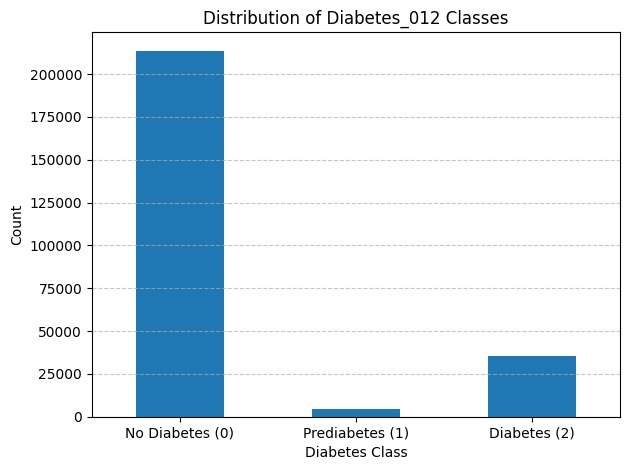

In [11]:
counts = diabetes_012.value_counts().reindex([0, 1, 2], fill_value=0)

counts.plot(kind='bar')
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.title("Distribution of Diabetes_012 Classes")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
skew(diabetes_012)

np.float64(1.9763787297494344)

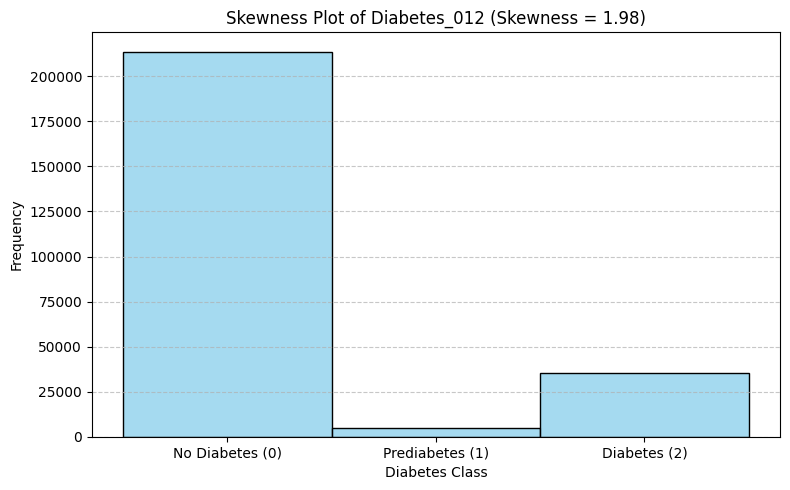

In [13]:
diabetes_012_skew = skew(diabetes_012)

plt.figure(figsize=(8, 5))
sns.histplot(diabetes_012, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of Diabetes_012 (Skewness = {diabetes_012_skew:.2f})")
plt.xlabel("Diabetes Class")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2], ["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

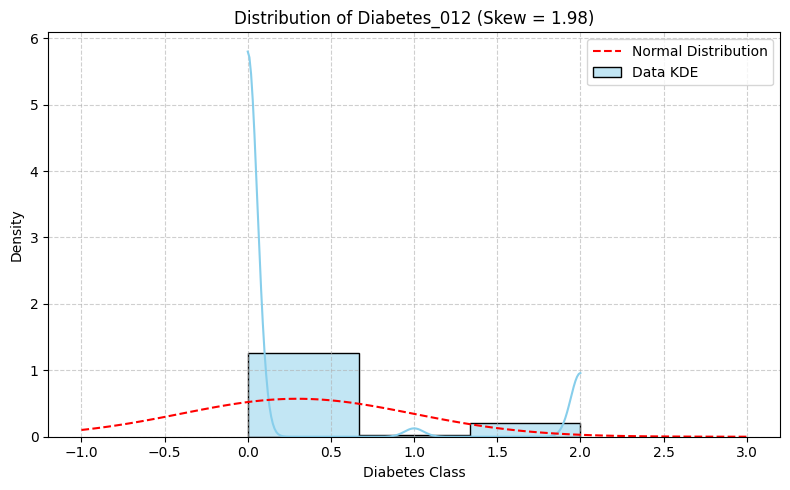

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(diabetes_012, kde=True, stat="density", bins=3, color="skyblue", edgecolor="black", label="Data KDE")

# Overlay normal distribution with same mean & std
mu, std = diabetes_012.mean(), diabetes_012.std()
xmin, xmax = diabetes_012.min(), diabetes_012.max()
x = np.linspace(xmin - 1, xmax + 1, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', label="Normal Distribution")

plt.title(f"Distribution of Diabetes_012 (Skew = {diabetes_012.skew():.2f})")
plt.xlabel("Diabetes Class")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [15]:
counts = diabetes_012.value_counts().sort_index()
percentages = diabetes_012.value_counts(normalize=True).sort_index() * 100
diabetes_012_df = pd.DataFrame({
    "Count": counts,
    "Percentage": percentages.round(2)
})
print(diabetes_012_df)


               Count  Percentage
Diabetes_012                    
0.0           213703       84.24
1.0             4631        1.83
2.0            35346       13.93


In [16]:
diabetes_012_df

,Count,Percentage
Diabetes_012,,
0.0,213703,84.24
1.0,4631,1.83
2.0,35346,13.93


In [17]:
diabetes_012.dtype

dtype('float64')

In [18]:
if "BMI" in diabetes.columns:
    print(diabetes.groupby("Diabetes_012")["BMI"].mean())


Diabetes_012
0.0    27.742521
1.0    30.724466
2.0    31.944011
Name: BMI, dtype: float64


In [19]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #1a9110ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for HighBP col
</h1>

In [20]:
highBp = diabetes["HighBP"]
highBp.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: HighBP, dtype: float64

In [21]:
highBp.value_counts()

HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

In [22]:
highBp.describe()

count    253680.000000
mean          0.429001
std           0.494934
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64

In [23]:
highBp.isnull().sum()

np.int64(0)

In [24]:
highBp.unique()

array([1., 0.])

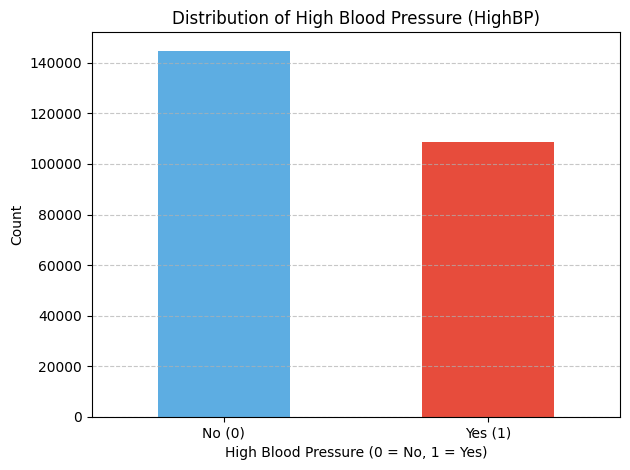

In [25]:
counts = highBp.value_counts().sort_index()
counts.plot(kind='bar', color=["#5DADE2", "#E74C3C"])
plt.title("Distribution of High Blood Pressure (HighBP)")
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No (0)", "Yes (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


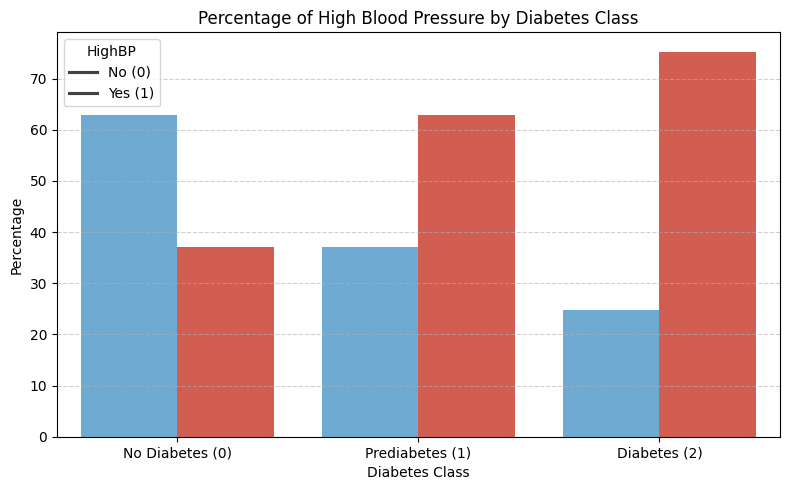

In [26]:
percent_df = pd.crosstab(diabetes_012, diabetes["HighBP"], normalize='index') * 100
percent_df = percent_df.reset_index().melt(id_vars="Diabetes_012", var_name="HighBP", value_name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(data=percent_df, x="Diabetes_012", y="Percentage", hue="HighBP", palette=["#5DADE2", "#E74C3C"])

plt.title("Percentage of High Blood Pressure by Diabetes Class")
plt.xlabel("Diabetes Class")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"])
plt.legend(title="HighBP", labels=["No (0)", "Yes (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [27]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #266ad7ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for HighChol col
</h1>

In [28]:
HighChol = diabetes["HighChol"]
diabetes["HighChol"].describe()

count    253680.000000
mean          0.424121
std           0.494210
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighChol, dtype: float64

In [29]:
HighChol.isnull().sum()

np.int64(0)

In [30]:
HighChol.value_counts()

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

In [31]:
HighChol.unique()

array([1., 0.])

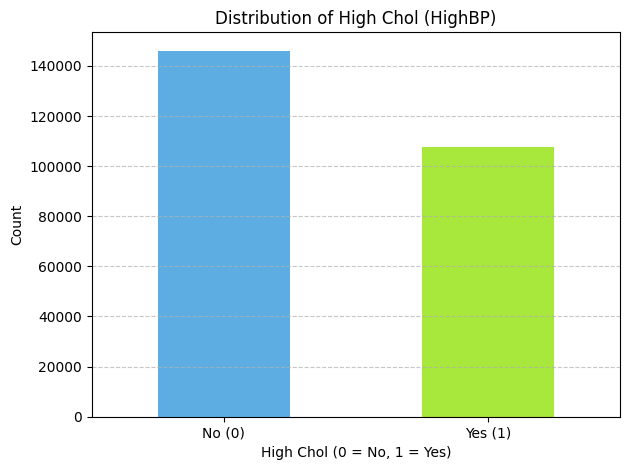

In [32]:
counts = HighChol.value_counts().sort_index()
counts.plot(kind='bar', color=["#5DADE2", "#A8E73C"])
plt.title("Distribution of High Chol (HighBP)")
plt.xlabel("High Chol (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No (0)", "Yes (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

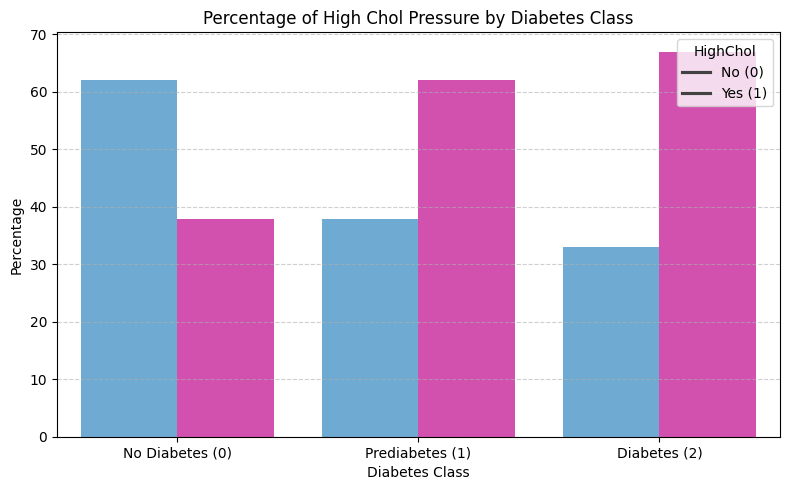

In [33]:
percent_df = pd.crosstab(diabetes_012, HighChol, normalize='index') * 100
percent_df = percent_df.reset_index().melt(id_vars="Diabetes_012", var_name="HighChol", value_name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(data=percent_df, x="Diabetes_012", y="Percentage", hue="HighChol", palette=["#5DADE2", "#E73CB9"])

plt.title("Percentage of High Chol Pressure by Diabetes Class")
plt.xlabel("Diabetes Class")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2], labels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"])
plt.legend(title="HighChol", labels=["No (0)", "Yes (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [34]:
skew(HighChol)

np.float64(0.3070728628831409)

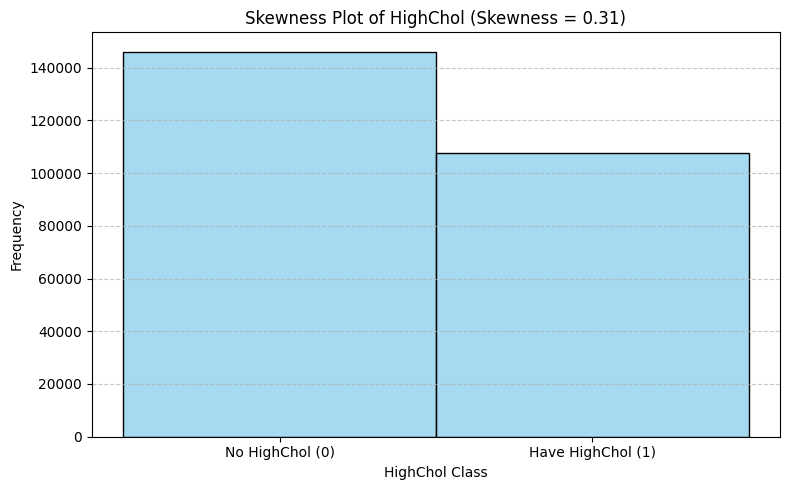

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(HighChol, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of HighChol (Skewness = {skew(HighChol):.2f})")
plt.xlabel("HighChol Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["No HighChol (0)", "Have HighChol (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

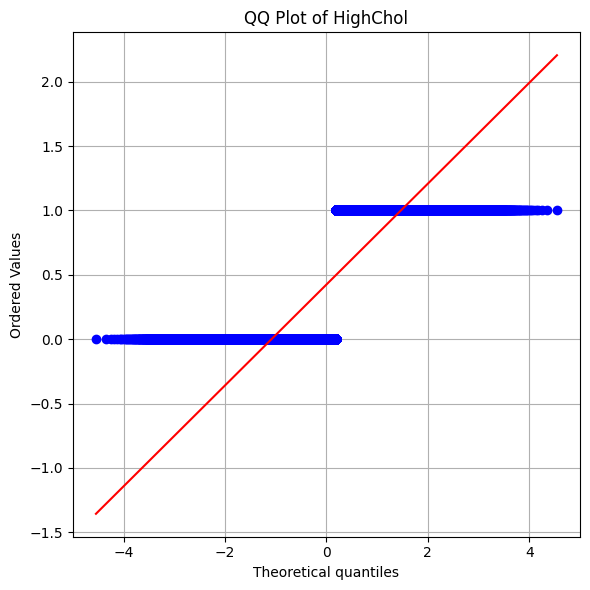

In [36]:
plt.figure(figsize=(6, 6))
stats.probplot(HighChol, dist="norm", plot=plt)
plt.title("QQ Plot of HighChol")
plt.grid(True)
plt.tight_layout()
plt.show()

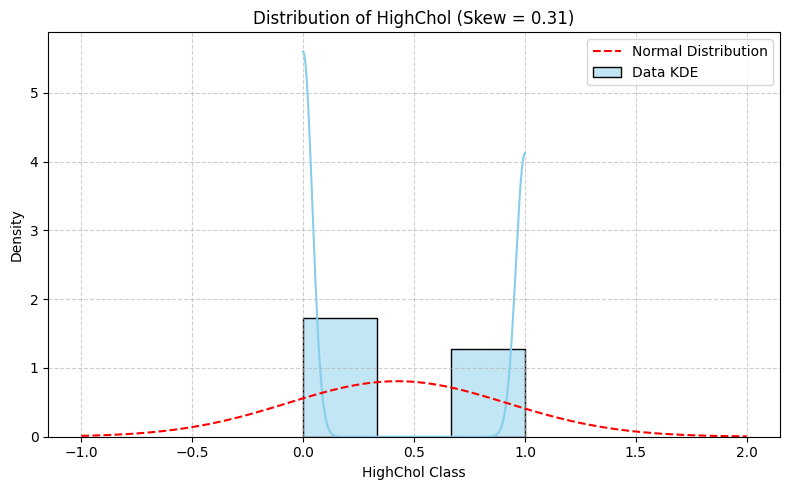

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(HighChol, kde=True, stat="density", bins=3, color="skyblue", edgecolor="black", label="Data KDE")

# Overlay normal distribution with same mean & std
mu, std = HighChol.mean(), HighChol.std()
xmin, xmax = HighChol.min(), HighChol.max()
x = np.linspace(xmin - 1, xmax + 1, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', label="Normal Distribution")

plt.title(f"Distribution of HighChol (Skew = {HighChol.skew():.2f})")
plt.xlabel("HighChol Class")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h1 style="
  text-align: center; 
  color: #a5d726ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for CholCheck col
</h1>

In [38]:
CholCheck = diabetes["CholCheck"]
diabetes["CholCheck"].describe()

count    253680.000000
mean          0.962670
std           0.189571
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CholCheck, dtype: float64

In [39]:
CholCheck.unique()

array([1., 0.])

In [40]:
CholCheck.isnull().sum()

np.int64(0)

In [41]:
CholCheck.value_counts()

CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64

In [42]:
CholCheck.dtype

dtype('float64')

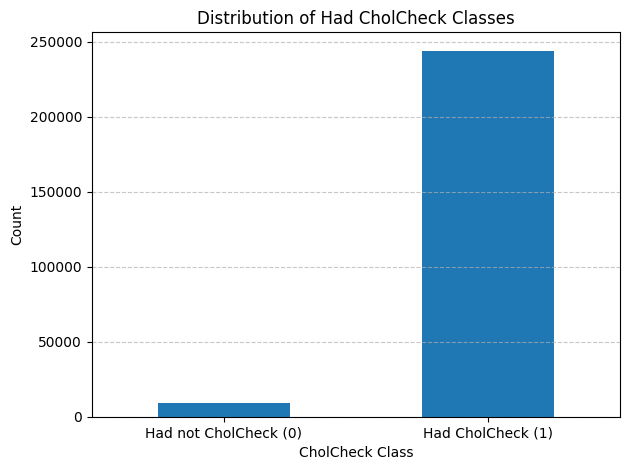

In [43]:
CholCheck_counts = CholCheck.value_counts().reindex([0, 1], fill_value=0)

CholCheck_counts.plot(kind='bar')
plt.xlabel("CholCheck Class")
plt.ylabel("Count")
plt.title("Distribution of Had CholCheck Classes")
plt.xticks(ticks=[0, 1], labels=["Had not CholCheck (0)", "Had CholCheck (1)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

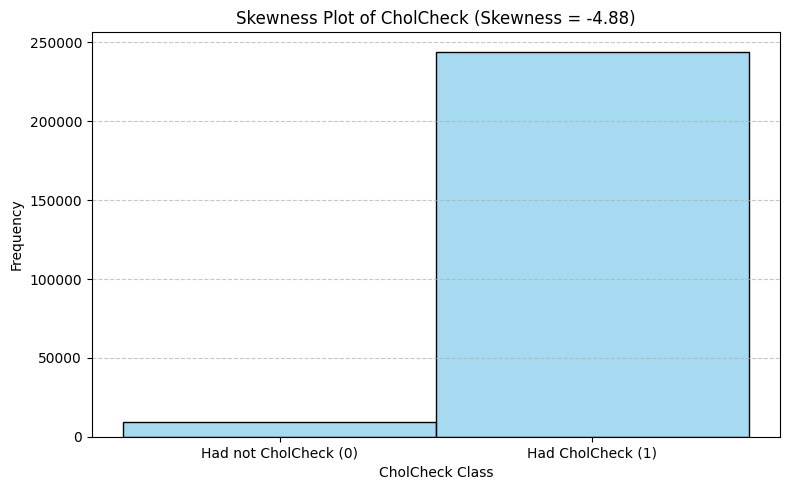

In [44]:
CholCheck_skew = skew(CholCheck)

plt.figure(figsize=(8, 5))
sns.histplot(CholCheck, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of CholCheck (Skewness = {CholCheck_skew:.2f})")
plt.xlabel("CholCheck Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Had not CholCheck (0)", "Had CholCheck (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7160\2113431120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=CholCheck, palette="pastel", edgecolor="black")


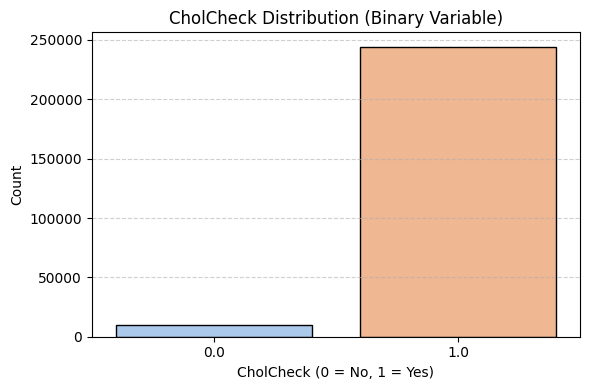

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(x=CholCheck, palette="pastel", edgecolor="black")

plt.title("CholCheck Distribution (Binary Variable)")
plt.xlabel("CholCheck (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [46]:
CholCheck_counts = CholCheck.value_counts().sort_index()
percentages = CholCheck.value_counts(normalize=True).sort_index() * 100
CholCheck_df = pd.DataFrame({
    "Count": CholCheck_counts,
    "Percentage": percentages.round(2)
})
print(CholCheck_df)

            Count  Percentage
CholCheck                    
0.0          9470        3.73
1.0        244210       96.27


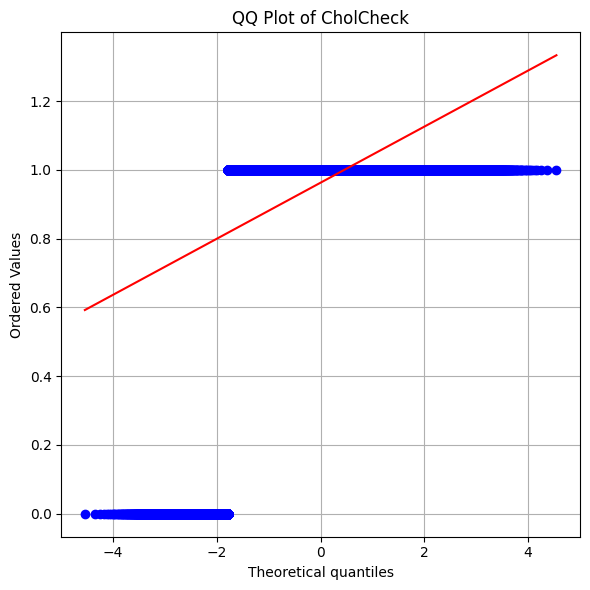

In [47]:
plt.figure(figsize=(6, 6))
stats.probplot(CholCheck, dist="norm", plot=plt)
plt.title("QQ Plot of CholCheck")
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #ffffffff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for BMI col
</h1>

In [49]:
BMI = diabetes["BMI"]
diabetes["BMI"].dtype

dtype('float64')

In [50]:
BMI.unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [51]:
BMI.describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [52]:
BMI.isnull().sum()

np.int64(0)

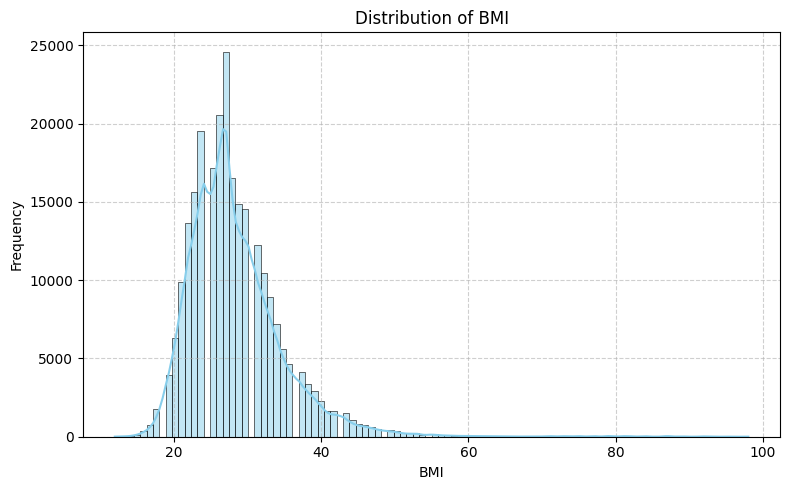

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(BMI, kde=True, color="skyblue", edgecolor="black", bins=100)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

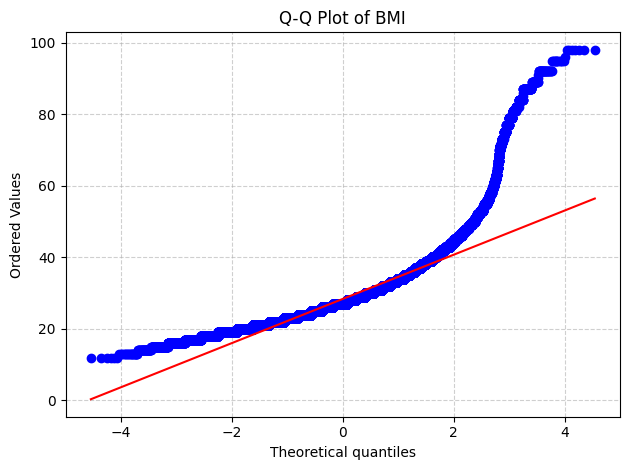

In [54]:
stats.probplot(BMI, dist="norm", plot=plt)
plt.title("Q-Q Plot of BMI")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [55]:
skew(BMI)

np.float64(2.1219912109445866)

In [56]:
BMI.value_counts()

BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
86.0        1
91.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_7160\3081757263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CholCheck", y="BMI", data=diabetes, palette="Set3")


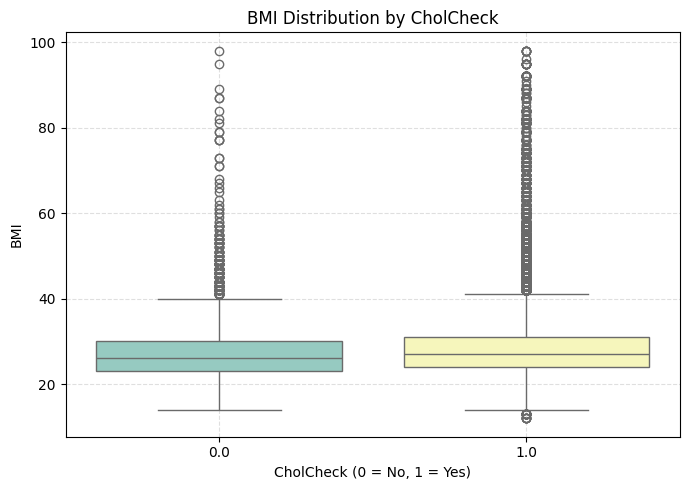

In [57]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="CholCheck", y="BMI", data=diabetes, palette="Set3")
plt.title("BMI Distribution by CholCheck")
plt.xlabel("CholCheck (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


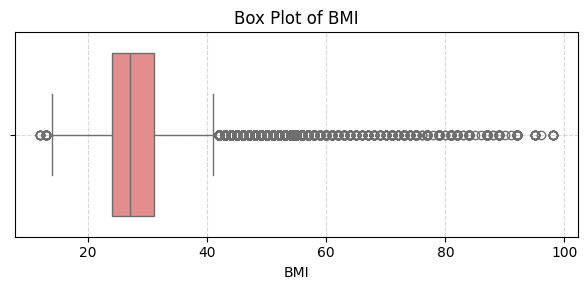

In [58]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=BMI, color="lightcoral")
plt.title("Box Plot of BMI")
plt.xlabel("BMI")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7160\85167495.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


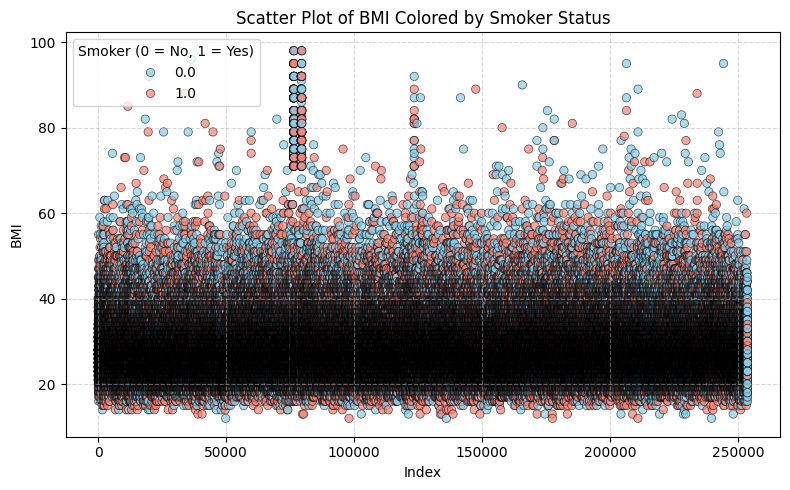

In [59]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=range(len(BMI)), 
    y="BMI", 
    hue="Smoker", 
    palette={0: "skyblue", 1: "salmon"}, 
    data=diabetes,
    alpha=0.7,
    edgecolor="black"
)

plt.title("Scatter Plot of BMI Colored by Smoker Status")
plt.xlabel("Index")
plt.ylabel("BMI")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Smoker (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()


In [60]:
bmi = diabetes["BMI"]
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = bmi[(bmi < lower_threshold) | (bmi > upper_threshold)]
n_outliers = outliers.count()

print(f"Number of outliers: {n_outliers}")

Number of outliers: 9847


<h1 style="
  text-align: center; 
  color: #ffffffff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  Correlation on dataset
</h1>

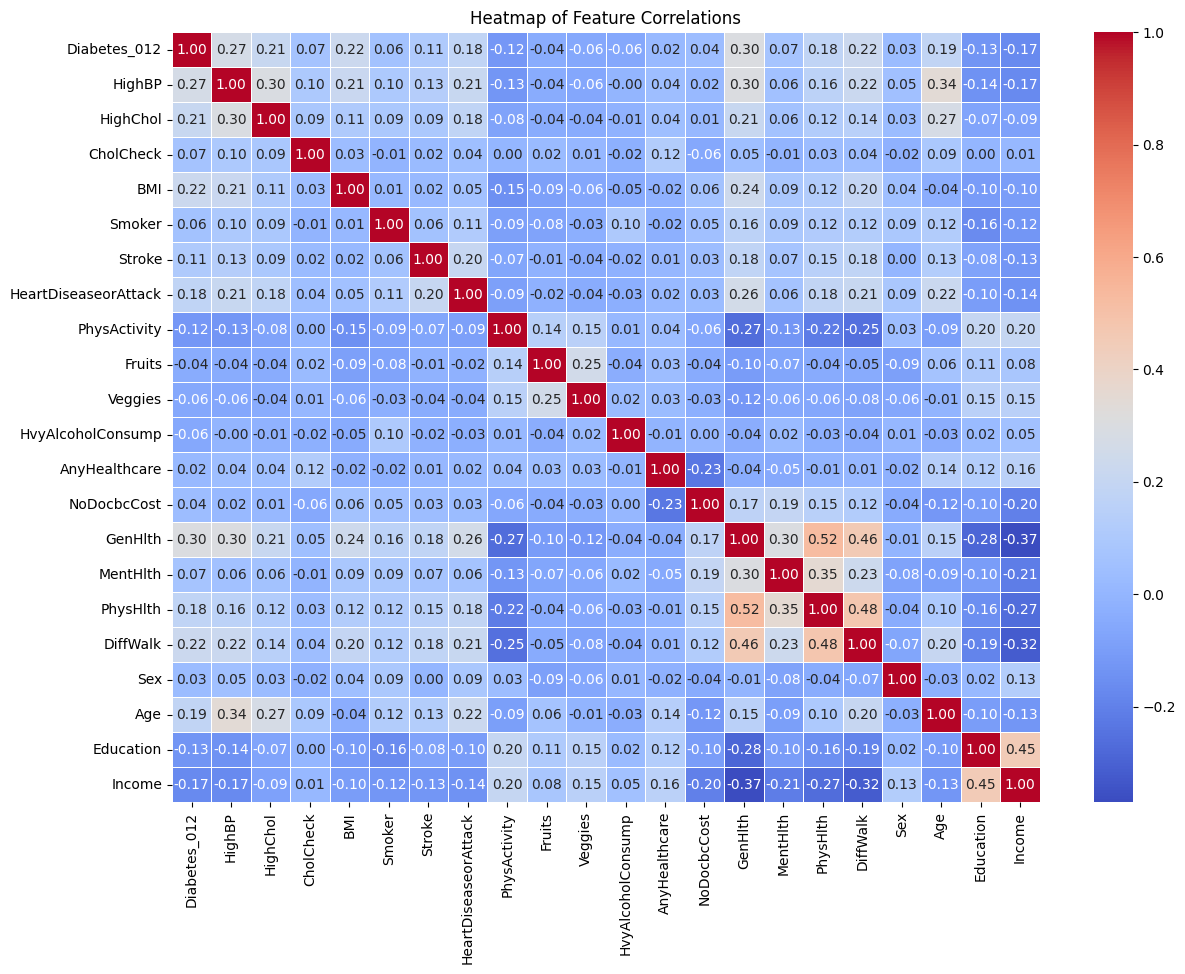

In [61]:
corr = diabetes.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap of Feature Correlations')
plt.show()

<h1 style="
  text-align: center; 
  color: #c52929ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Smoker col
</h1>

In [62]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [63]:
Smoker = diabetes["Smoker"]
diabetes["Smoker"].describe()

count    253680.000000
mean          0.443169
std           0.496761
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Smoker, dtype: float64

In [64]:
Smoker.unique()

array([1., 0.])

In [65]:
Smoker.isnull().sum()

np.int64(0)

In [66]:
Smoker.dtype

dtype('float64')

In [67]:
Smoker.value_counts()

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_7160\1226236483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Smoker, palette="pastel", edgecolor="black")


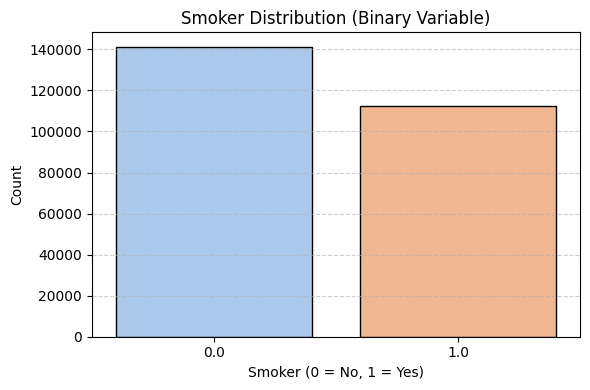

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(x=Smoker, palette="pastel", edgecolor="black")

plt.title("Smoker Distribution (Binary Variable)")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7160\3655004402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Diabetes_012", y="Smoker", data=smoker_ratio, palette="viridis")


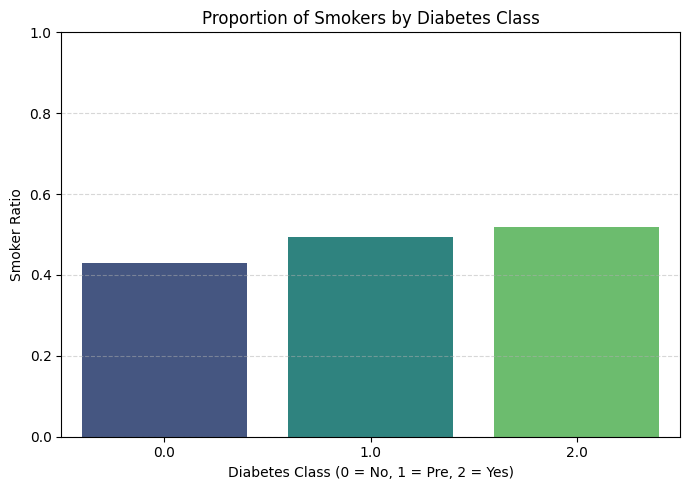

In [69]:
smoker_ratio = diabetes.groupby("Diabetes_012")["Smoker"].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x="Diabetes_012", y="Smoker", data=smoker_ratio, palette="viridis")

plt.title("Proportion of Smokers by Diabetes Class")
plt.xlabel("Diabetes Class (0 = No, 1 = Pre, 2 = Yes)")
plt.ylabel("Smoker Ratio")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [70]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #ccee10ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Stroke col
</h1>

In [71]:
Stroke = diabetes["Stroke"]
diabetes["Stroke"].value_counts()

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

In [72]:
Stroke.isnull().sum()

np.int64(0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7160\568841058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Stroke, palette="Blues", edgecolor="black")


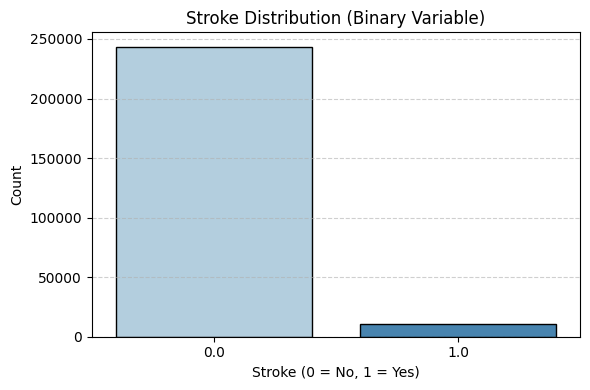

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(x=Stroke, palette="Blues", edgecolor="black")

plt.title("Stroke Distribution (Binary Variable)")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.show()

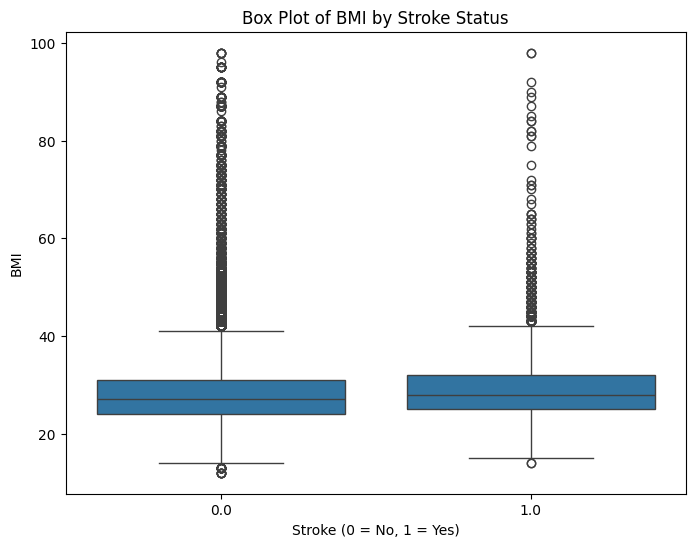

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stroke', y='BMI', data=diabetes)

plt.title('Box Plot of BMI by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

In [75]:
stroke = diabetes["Stroke"]
Q1 = stroke.quantile(0.25)
Q3 = stroke.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = stroke[(stroke < lower_threshold) | (stroke > upper_threshold)]
n_outliers = outliers.count()

print(f"Number of outliers: {n_outliers}")

Number of outliers: 10292


<h1 style="
  text-align: center; 
  color: #ffb300ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for HeartDiseaseorAttack col
</h1>

In [76]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [77]:
HeartDiseaseorAttack = diabetes["HeartDiseaseorAttack"]
diabetes["HeartDiseaseorAttack"].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [78]:
HeartDiseaseorAttack.dtype

dtype('float64')

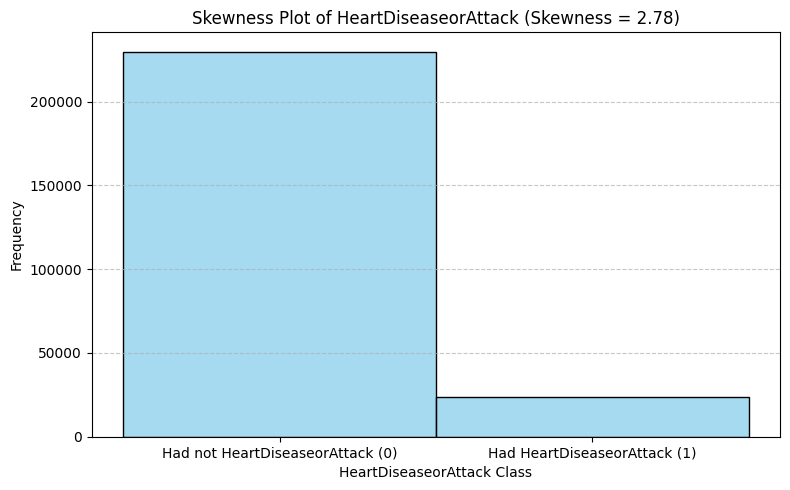

In [79]:
HeartDiseaseorAttack_skew = skew(diabetes["HeartDiseaseorAttack"])

plt.figure(figsize=(8, 5))
sns.histplot(HeartDiseaseorAttack, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of HeartDiseaseorAttack (Skewness = {HeartDiseaseorAttack_skew:.2f})")
plt.xlabel("HeartDiseaseorAttack Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Had not HeartDiseaseorAttack (0)", "Had HeartDiseaseorAttack (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1 style="
  text-align: center; 
  color: #858585ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for PyisActivity col
</h1>

In [80]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [81]:
PhysActivity = diabetes["PhysActivity"]
PhysActivity.value_counts()

PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64

In [82]:
PhysActivity.describe()

count    253680.000000
mean          0.756544
std           0.429169
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: PhysActivity, dtype: float64

In [83]:
PhysActivity.isnull().sum()

np.int64(0)

In [84]:
PhysActivity.unique()

array([0., 1.])

In [85]:
PhysActivity.dtype

dtype('float64')

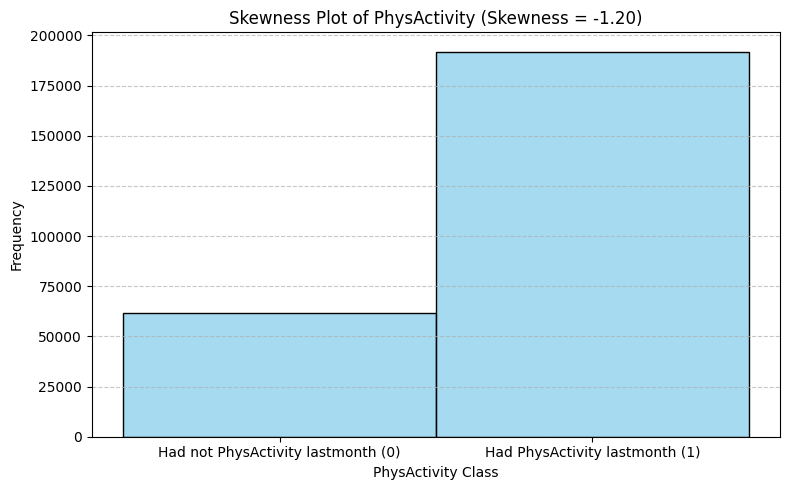

In [86]:
PhysActivity_skew = skew(PhysActivity)

plt.figure(figsize=(8, 5))
sns.histplot(diabetes["PhysActivity"], kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of PhysActivity (Skewness = {PhysActivity_skew:.2f})")
plt.xlabel("PhysActivity Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Had not PhysActivity lastmonth (0)", "Had PhysActivity lastmonth (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1 style="
  text-align: center; 
  color: #f40d80ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Fruits col
</h1>

In [87]:
Fruits = diabetes["Fruits"]
Fruits.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Fruits, dtype: float64

In [88]:
Fruits.isnull().sum()

np.int64(0)

In [89]:
Fruits.unique()

array([0., 1.])

In [90]:
Fruits.describe()

count    253680.000000
mean          0.634256
std           0.481639
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Fruits, dtype: float64

In [91]:
Fruits.dtype

dtype('float64')

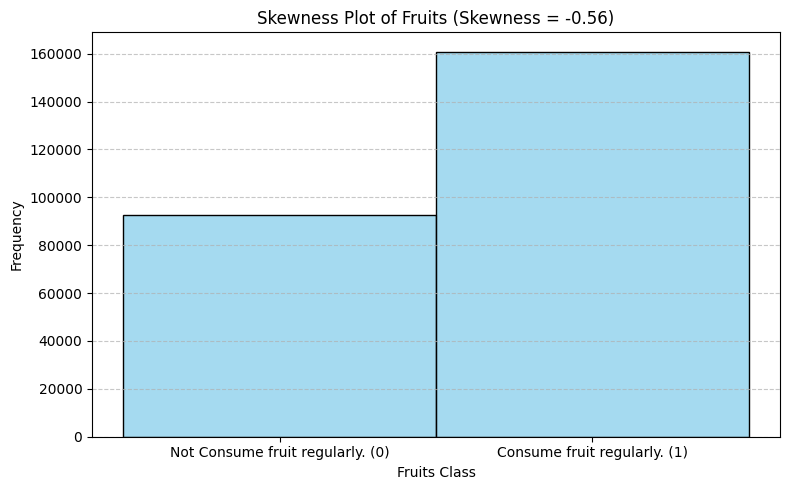

In [92]:
Fruits_skew = skew(Fruits)

plt.figure(figsize=(8, 5))
sns.histplot(Fruits, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of Fruits (Skewness = {Fruits_skew:.2f})")
plt.xlabel("Fruits Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Not Consume fruit regularly. (0)", "Consume fruit regularly. (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [93]:
Fruits.value_counts()

Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64

In [94]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #6a6e18ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for Veggies col
</h1>

In [95]:
Veggies = diabetes["Veggies"]
Veggies.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Veggies, dtype: float64

In [96]:
Veggies.isnull().sum()

np.int64(0)

In [97]:
Veggies.unique()

array([1., 0.])

In [98]:
Veggies.dtype

dtype('float64')

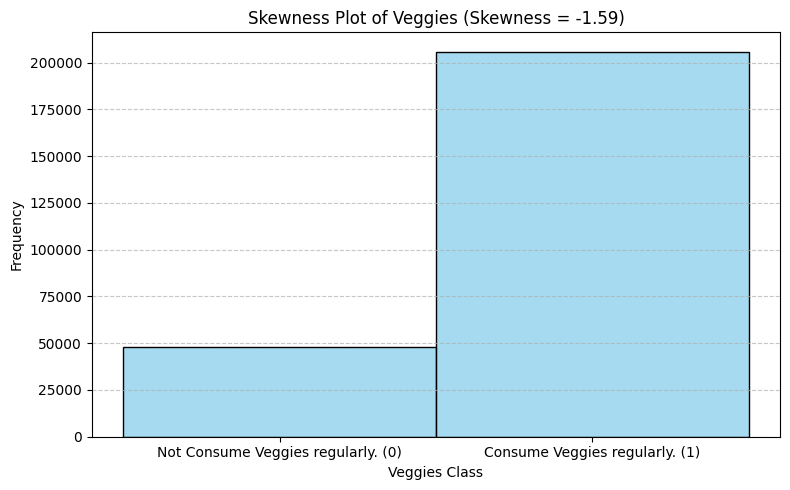

In [99]:
Veggies_skew = skew(Veggies)

plt.figure(figsize=(8, 5))
sns.histplot(Veggies, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of Veggies (Skewness = {Veggies_skew:.2f})")
plt.xlabel("Veggies Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Not Consume Veggies regularly. (0)", "Consume Veggies regularly. (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [100]:
Veggies.value_counts()

Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64

In [101]:
veggies_counts = Veggies.value_counts().sort_index()
veggies_percentages = Veggies.value_counts(normalize=True).sort_index() * 100
veggies_df = pd.DataFrame({
    "Count": veggies_counts,
    "Percentage": veggies_percentages.round(2)
})
print(veggies_df)

          Count  Percentage
Veggies                    
0.0       47839       18.86
1.0      205841       81.14


<h1 style="
  text-align: center; 
  color: #d8d8d8ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for HvyAlcoholConsump col
</h1>

In [102]:
HvyAlcoholConsump = diabetes["HvyAlcoholConsump"]
HvyAlcoholConsump.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HvyAlcoholConsump, dtype: float64

In [103]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [104]:
HvyAlcoholConsump.unique()

array([0., 1.])

In [105]:
HvyAlcoholConsump.isnull().sum()

np.int64(0)

In [106]:
HvyAlcoholConsump.value_counts()

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

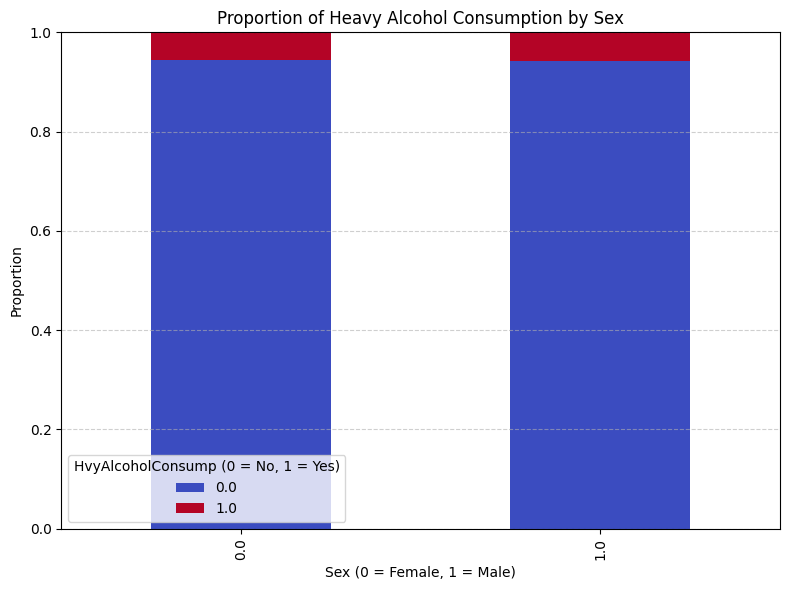

In [107]:
prop_df = pd.crosstab(diabetes['Sex'], HvyAlcoholConsump, normalize='index')

prop_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

plt.title('Proportion of Heavy Alcohol Consumption by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Proportion')
plt.legend(title='HvyAlcoholConsump (0 = No, 1 = Yes)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [108]:
diabetes["Sex"].value_counts()

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

In [109]:
women = diabetes[diabetes['Sex'] == 0]
men = diabetes[diabetes['Sex'] == 1]

In [110]:
women_counts = women['HvyAlcoholConsump'].value_counts(normalize=True).sort_index()
men_counts = men['HvyAlcoholConsump'].value_counts(normalize=True).sort_index()

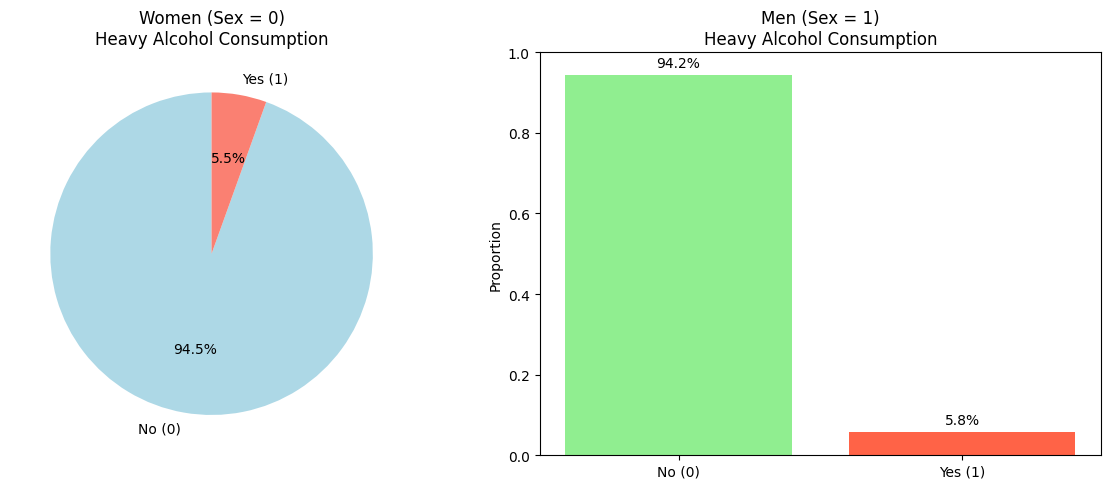

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Pie Chart for Women
axes[0].pie(
    women_counts, 
    labels=['No (0)', 'Yes (1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'salmon']
)
axes[0].set_title('Women (Sex = 0)\nHeavy Alcohol Consumption')

# Plot 2: Bar Chart for Men
axes[1].bar(
    ['No (0)', 'Yes (1)'], 
    men_counts.values,
    color=['lightgreen', 'tomato']
)
axes[1].set_title('Men (Sex = 1)\nHeavy Alcohol Consumption')
axes[1].set_ylabel('Proportion')
axes[1].set_ylim(0, 1)
for i, v in enumerate(men_counts.values):
    axes[1].text(i, v + 0.02, f"{v:.1%}", ha='center')

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7160\2046202335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=['lightblue', 'tomato'])


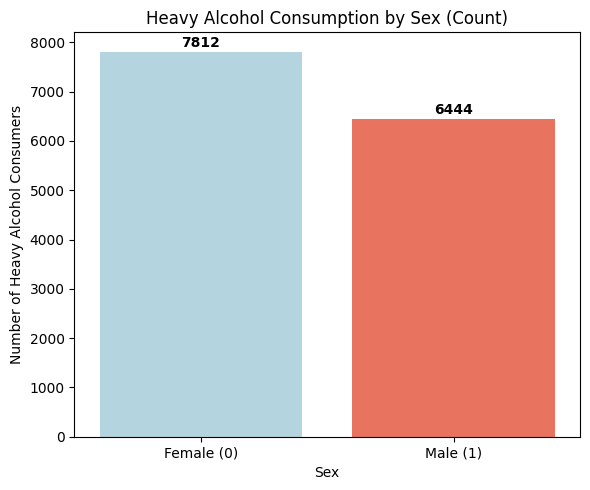

In [112]:
heavy_alcohol = diabetes[diabetes['HvyAlcoholConsump'] == 1]

# Count how many men and women
sex_counts = heavy_alcohol['Sex'].value_counts().sort_index()  # 0 = female, 1 = male

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=['lightblue', 'tomato'])

plt.xticks([0, 1], ['Female (0)', 'Male (1)'])
plt.xlabel('Sex')
plt.ylabel('Number of Heavy Alcohol Consumers')
plt.title('Heavy Alcohol Consumption by Sex (Count)')

# Add count labels
for i, v in enumerate(sex_counts.values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [113]:
HvyAlcoholConsump.value_counts()

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

<h1 style="
  text-align: center; 
  color: #d8d8d8ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for AnyHealthcare col
</h1>

In [115]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [116]:
AnyHealthcare = diabetes["AnyHealthcare"]
AnyHealthcare.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: AnyHealthcare, dtype: float64

In [117]:
AnyHealthcare.tail()

253675    1.0
253676    1.0
253677    1.0
253678    1.0
253679    1.0
Name: AnyHealthcare, dtype: float64

In [118]:
AnyHealthcare.value_counts()

AnyHealthcare
1.0    241263
0.0     12417
Name: count, dtype: int64

In [120]:
AnyHealthcare.isnull().sum()

np.int64(0)

In [121]:
AnyHealthcare.unique()

array([1., 0.])

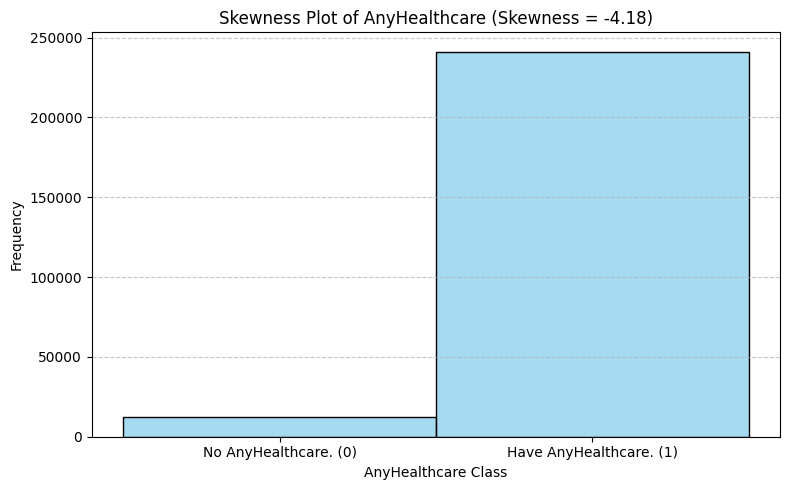

In [122]:
AnyHealthcare_skew = skew(AnyHealthcare)

plt.figure(figsize=(8, 5))
sns.histplot(AnyHealthcare, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of AnyHealthcare (Skewness = {AnyHealthcare_skew:.2f})")
plt.xlabel("AnyHealthcare Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["No AnyHealthcare. (0)", "Have AnyHealthcare. (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [123]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<h1 style="
  text-align: center; 
  color: #0008ffff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for NoDocBcCost col
</h1>

In [124]:
NoDocbcCost = diabetes["NoDocbcCost"]
NoDocbcCost.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: NoDocbcCost, dtype: float64

In [125]:
NoDocbcCost.value_counts()

NoDocbcCost
0.0    232326
1.0     21354
Name: count, dtype: int64

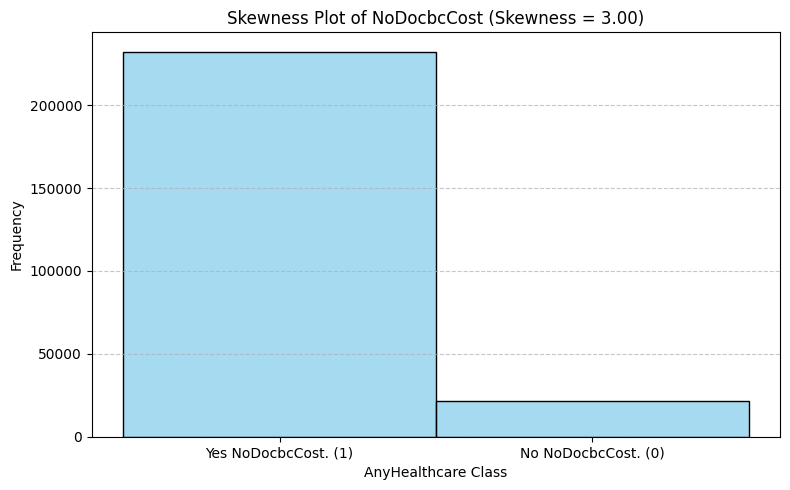

In [126]:
NoDocbcCost_skew = skew(NoDocbcCost)

plt.figure(figsize=(8, 5))
sns.histplot(NoDocbcCost, kde=False, bins=3, discrete=True, color="skyblue", edgecolor="black")

plt.title(f"Skewness Plot of NoDocbcCost (Skewness = {NoDocbcCost_skew:.2f})")
plt.xlabel("AnyHealthcare Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Yes NoDocbcCost. (1)", "No NoDocbcCost. (0)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1 style="
  text-align: center; 
  color: #1ddd50ff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for GenHlth col
</h1>

In [132]:
GenHlth = diabetes["GenHlth"]
GenHlth.head()

0    5.0
1    3.0
2    5.0
3    2.0
4    2.0
Name: GenHlth, dtype: float64

In [133]:
GenHlth.value_counts()

GenHlth
2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: count, dtype: int64

In [134]:
GenHlth.isnull().sum()

np.int64(0)

In [138]:
genhlth_counts = GenHlth.value_counts().sort_index()
genhlth_percentages = GenHlth.value_counts(normalize=True).sort_index() * 100
genhlth_df = pd.DataFrame({
    "Count": genhlth_counts,
    "Percentage": genhlth_percentages.round(2)
})
print(genhlth_df)

         Count  Percentage
GenHlth                   
1.0      45299       17.86
2.0      89084       35.12
3.0      75646       29.82
4.0      31570       12.44
5.0      12081        4.76


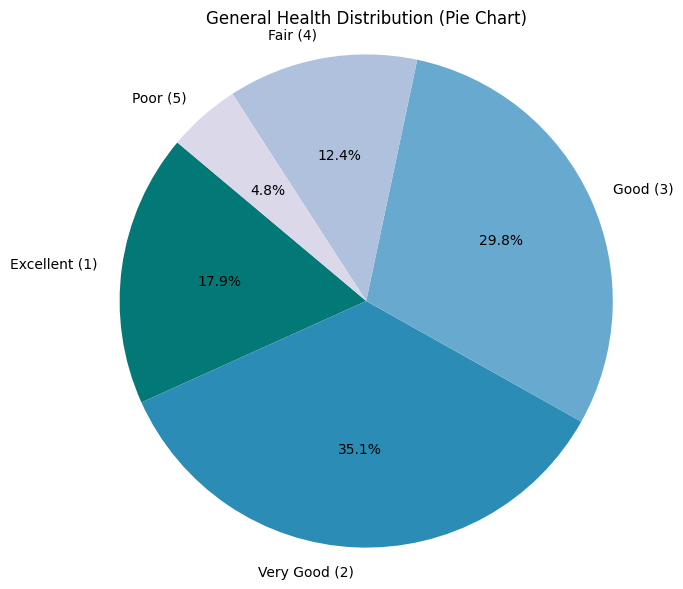

In [144]:
labels = ['Excellent (1)', 'Very Good (2)', 'Good (3)', 'Fair (4)', 'Poor (5)']

cmap = plt.cm.PuBuGn_r
colors = cmap(np.linspace(0.2, 0.8, len(genhlth_counts)))

plt.figure(figsize=(7, 7))
plt.pie(
    genhlth_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('General Health Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

<h1 style="
  text-align: center; 
  color: #1dc7ddff; 
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
  font-size: 4.5em; 
  letter-spacing: 2px; 
  font-weight: 700; 
">
  EDA for MenHlth col
</h1>

In [153]:
MentHlth = diabetes["MentHlth"]
MentHlth.head()

0    18.0
1     0.0
2    30.0
3     0.0
4     3.0
Name: MentHlth, dtype: float64

In [156]:
MentHlth.isnull().sum()

np.int64(0)

In [155]:
MentHlth.value_counts()

MentHlth
0.0     175680
2.0      13054
30.0     12088
5.0       9030
1.0       8538
3.0       7381
10.0      6373
15.0      5505
4.0       3789
20.0      3364
7.0       3100
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: count, dtype: int64

In [157]:
MentHlth.dtype

dtype('float64')

In [160]:
MentHlth.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1.,  4.,
        7.,  8., 21., 14., 26., 29., 16., 28., 11., 12., 24., 17., 13.,
       27., 19., 22.,  9., 23.])

In [167]:
invalid_values = diabetes[(MentHlth < 0) | (MentHlth > 30)]
print("Number of out of range: ", len(invalid_values))

Number of out of range:  0


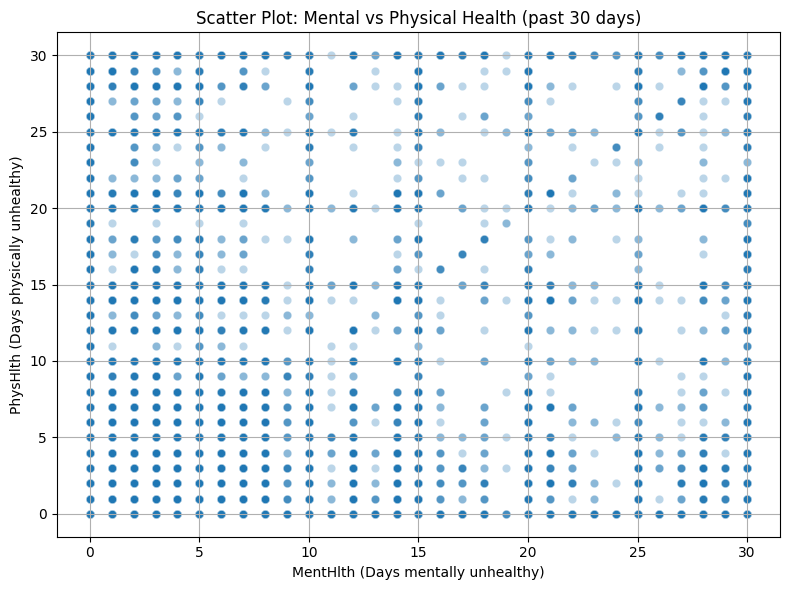

In [168]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MentHlth', y='PhysHlth', data=diabetes, alpha=0.3)

plt.title('Scatter Plot: Mental vs Physical Health (past 30 days)')
plt.xlabel('MentHlth (Days mentally unhealthy)')
plt.ylabel('PhysHlth (Days physically unhealthy)')
plt.grid(True)
plt.tight_layout()
plt.show()

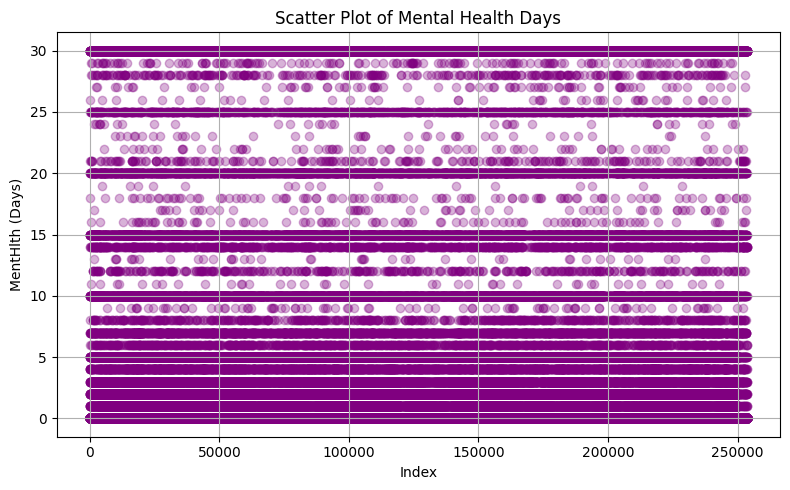

In [169]:
plt.figure(figsize=(8, 5))
plt.scatter(MentHlth.index, MentHlth, alpha=0.3, color='purple')
plt.title('Scatter Plot of Mental Health Days')
plt.xlabel('Index')
plt.ylabel('MentHlth (Days)')
plt.grid(True)
plt.tight_layout()
plt.show()

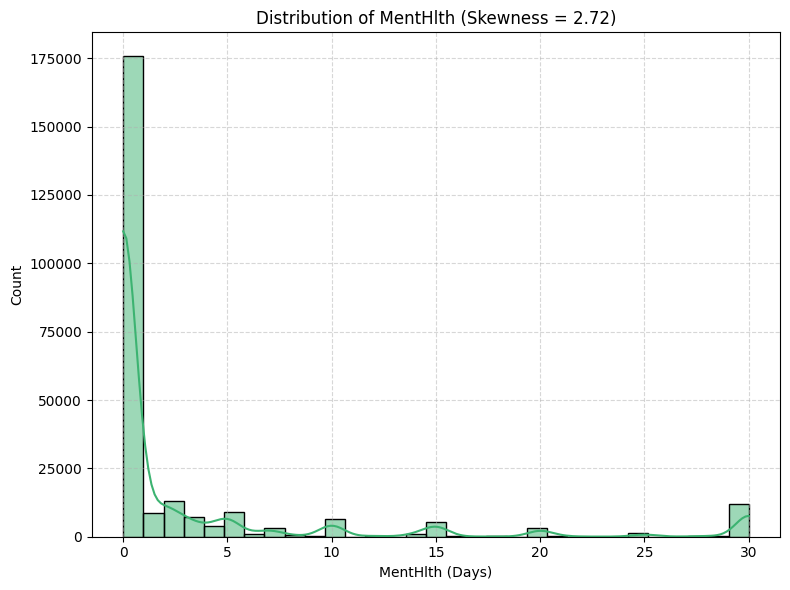

In [170]:
MentHlth_skew = skew(MentHlth)

plt.figure(figsize=(8, 6))
sns.histplot(MentHlth, bins=31, kde=True, color='mediumseagreen')

plt.title(f'Distribution of MentHlth (Skewness = {MentHlth_skew:.2f})')
plt.xlabel('MentHlth (Days)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [171]:
menthlth_counts = MentHlth.value_counts().sort_index()
menthlth_percentages = MentHlth.value_counts(normalize=True).sort_index() * 100
menthlth_df = pd.DataFrame({
    "Count": menthlth_counts,
    "Percentage": menthlth_percentages.round(2)
})
print(menthlth_df)

           Count  Percentage
MentHlth                    
0.0       175680       69.25
1.0         8538        3.37
2.0        13054        5.15
3.0         7381        2.91
4.0         3789        1.49
5.0         9030        3.56
6.0          988        0.39
7.0         3100        1.22
8.0          639        0.25
9.0           91        0.04
10.0        6373        2.51
11.0          41        0.02
12.0         398        0.16
13.0          41        0.02
14.0        1167        0.46
15.0        5505        2.17
16.0          88        0.03
17.0          54        0.02
18.0          97        0.04
19.0          16        0.01
20.0        3364        1.33
21.0         227        0.09
22.0          63        0.02
23.0          38        0.01
24.0          33        0.01
25.0        1188        0.47
26.0          45        0.02
27.0          79        0.03
28.0         327        0.13
29.0         158        0.06
30.0       12088        4.77


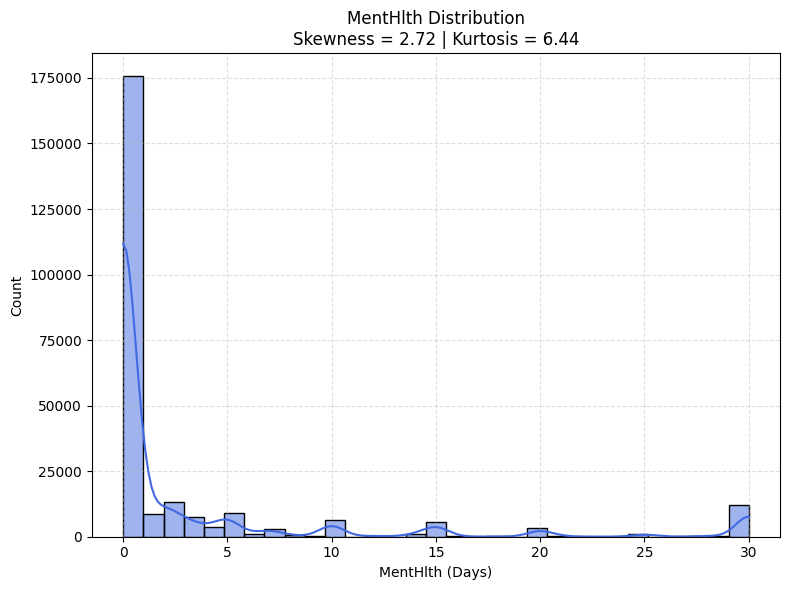

In [173]:
MentHlth_skew_val = skew(MentHlth)
MentHlth_kurt_val = kurtosis(MentHlth)

plt.figure(figsize=(8, 6))
sns.histplot(MentHlth, bins=31, kde=True, color='royalblue')

plt.title(f'MentHlth Distribution\nSkewness = {MentHlth_skew_val:.2f} | Kurtosis = {MentHlth_kurt_val:.2f}')
plt.xlabel('MentHlth (Days)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7160\2676548476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=['lightcoral', 'mediumseagreen'])


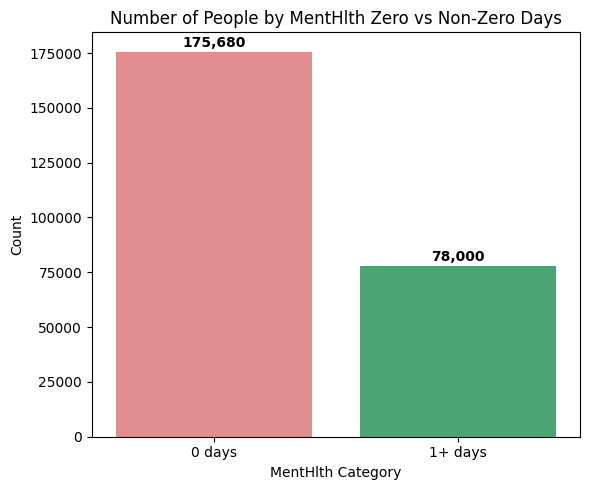

In [174]:
diabetes['MentHlth_flag'] = MentHlth.apply(lambda x: '0 days' if x == 0 else '1+ days')

counts = diabetes['MentHlth_flag'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=counts.index, y=counts.values, palette=['lightcoral', 'mediumseagreen'])

plt.title('Number of People by MentHlth Zero vs Non-Zero Days')
plt.xlabel('MentHlth Category')
plt.ylabel('Count')

for i, v in enumerate(counts.values):
    plt.text(i, v + 2000, f"{v:,}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [175]:
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'MentHlth_flag'],
      dtype='object')